### Practical Task

* Create a Jupyter Notebook called diabetes_regression.ipynb.
* Read diabetes.csv into your Jupyter Notebook.
* The diabetes.csv aims to predict a person’s progression in the condition
with respect to various attributes about them.
* Differentiate between the independent variables and the dependent
variable, and assign them to variables X and Y.
* Generate training and test sets comprising 80% and 20% of the data
respectively.
* Use a MinMaxScaler and StandardScaler from sklearn.preprocessing. Fit
these scalers on the train set, and use these fit scalers to transform the train
and test sets.
* Generate a multiple linear regression model using the training set. Use all
of the independent variables.
* Print out the intercept and coefficients of the trained model.
* Generate predictions for the test set.
* Compute R-squared for your model on the test set. You can use r2_score
from sklearn.metrics to obtain this score.
* Ensure your Notebook includes comments about what your code is
accomplishing and notes about model outputs such as R-squared.

In [22]:
import numpy as np
import pandas as pd
import sklearn
# Import required libraries

import matplotlib.pyplot as plt
import seaborn as sns
# Import libraries for Graph plotting

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Used sklearn specific library to deal with scaling, imputation and linear regression

%matplotlib inline
# Line of code helpful to save and pan, as using Matplotlib to plot and render interactive plots

In [23]:
data = pd.read_csv('diabetes.csv')
data.head()
# Import the dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [24]:
data.shape
# Show how many columns and rows in the dataset

(442, 11)

In [25]:
data.info()
# Show total rows and columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


C:\Users\User\AppData\Local\Temp\ipykernel_8940\1727803663.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, (ax_hist) = plt.subplots(1, sharex=True)


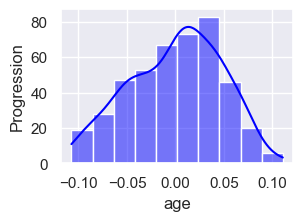

<Figure size 300x200 with 0 Axes>

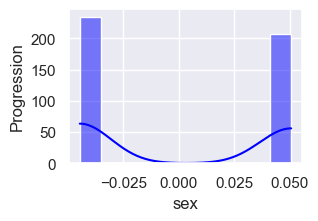

<Figure size 300x200 with 0 Axes>

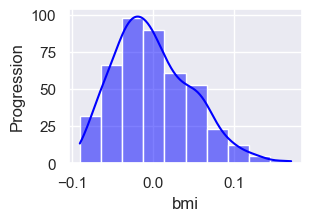

<Figure size 300x200 with 0 Axes>

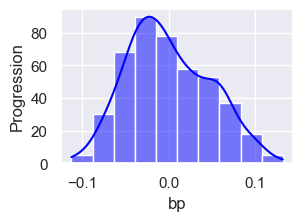

<Figure size 300x200 with 0 Axes>

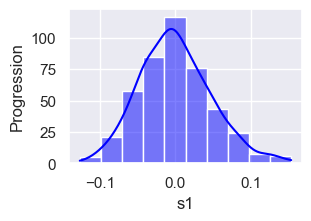

<Figure size 300x200 with 0 Axes>

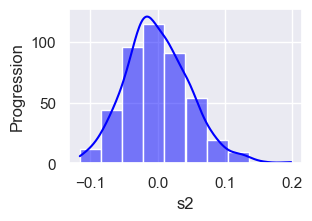

<Figure size 300x200 with 0 Axes>

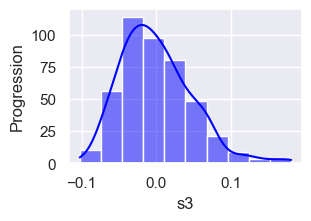

<Figure size 300x200 with 0 Axes>

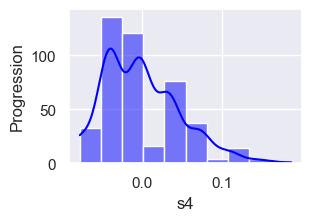

<Figure size 300x200 with 0 Axes>

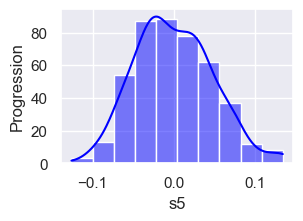

<Figure size 300x200 with 0 Axes>

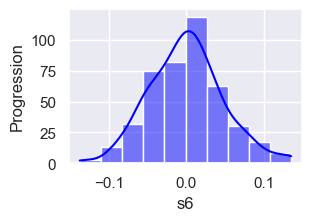

<Figure size 300x200 with 0 Axes>

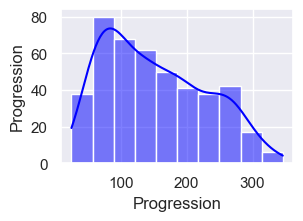

<Figure size 300x200 with 0 Axes>

In [26]:
for i in data.columns:
    sns.set_theme(rc={"figure.figsize":(3, 2)})
    f, (ax_hist) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i ,ylabel='Progression')
    sns.histplot(data[i], ax=ax_hist, bins = 10, color='blue', kde=True)
    plt.figure()
    plt.tight_layout()
# Plot histplot to show whether data is gaussian.

In [27]:
X = data.drop('Progression', axis=1)   
# Drop the Progression variable and assign remaining to X

y = data[['Progression']]
# Use dropped Progression column to y as a target variable

<Axes: >

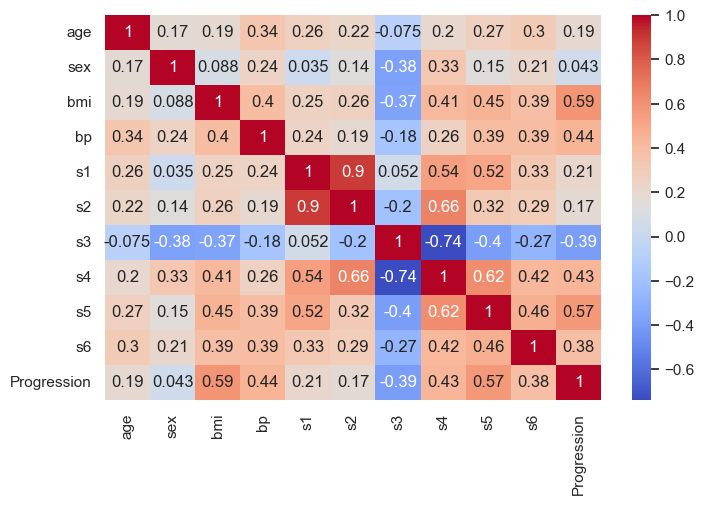

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(data.corr(),annot =True, cmap='coolwarm')
# Heatmap show correlation between variables

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  random_state= 42)
print('Training data:',X_train.shape,y_train.shape)
print('Test data:', X_test.shape, y_test.shape)
# Split data into test and train sets.

Training data: (353, 10) (353, 1)
Test data: (89, 10) (89, 1)


In [30]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)

X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)
# Applied Min Max scaler to train and test data sets

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Applied Standard scaler to all independent variables from train, nd test data

In [32]:
diabetes_model = LinearRegression()
# Create an empty Linearregression model
diabetes_model.fit(X_train,y_train)
# Fit the model.

LinearRegression()

In [33]:
print ('Intercept: \n', diabetes_model.intercept_)
print('Coffficients: \n', diabetes_model.coef_)
# Print intercept and coefficients

Intercept: 
 [153.73654391]
Coffficients: 
 [[  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
   24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]]


In [34]:
y_pred = diabetes_model.predict(X_test)
# create prediction with test dataset.

In [35]:
r2 = r2_score(y_test, y_pred)
print ('R Squared:', r2)
# Calculate and print r2 score.

R Squared: 0.4526027629719189


In [36]:
mse = mean_squared_error(y_test, y_pred)
print ('MSE :', mse)

mae = mean_absolute_error(y_test, y_pred)
print ('MAE :', mae)
# Calculate and print the mean squared error and mean absolute error.

MSE : 2900.193628493484
MAE : 42.79409467959996


In [37]:
y_pred = diabetes_model.predict(X_test)
# Predict the diabetes data test set

Text(0, 0.5, 'Predicted')

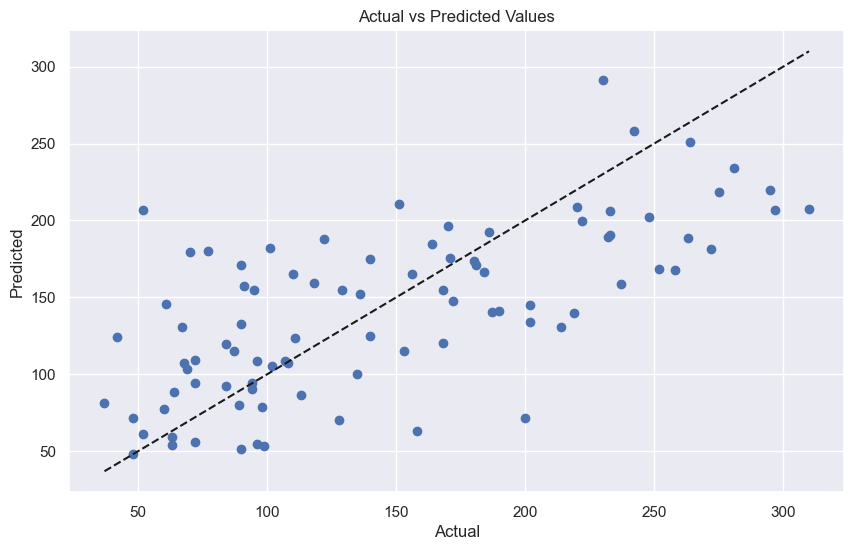

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
# Shows Actual and Predicted values.

This score is of model is 0.45 and not as high however the line of best-fit is quite central, which suggests that our model fits our observations well.